# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [9]:
# Libraries for data loading, data manipulation and data visulisation
# import *

# Libraries for data preparation and model building
# import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  #When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code

import warnings
warnings.filterwarnings('ignore') #

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

UsageError: unrecognized arguments: #When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [10]:
df = pd.read_csv('df_train.csv')
test_df = pd.read_csv('df_test.csv', index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


First we have to do a simple data inspection

In [11]:
df.head()


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


The shape will tell us how many rows and columns our data has

In [ ]:
df.shape
# (8763, 49)

We can see which columns have rows with null values. Here we observed that Valencia pressure has 2068  null rows. which accounts for 23.5% of the data. We will drop this column as it has a high amount of null values.

In [ ]:
missing_percent = df.isnull().sum() * 100 / len(df)
print(missing_percent)

In [ ]:
df.isnull().sum()
# Valencia_pressure       2068

Here we observe how many unique rows we have in our data set. We would expect Unnamed and time to have 100% unique values as they serve as an index. It is possible that there are duplicates but unlikely

In [ ]:
missing_percent = df.nunique()* 100 / len(df)
print (missing_percent)

We viewed the datatypes and noted that Seville Oressure and Valencia wind deg are object datatypes. Here we will have to use analysis for categorical data to analyse their relationship to other features of our dataset. 45 floats types, 1 int type and 3 object types

In [ ]:
df.info() 
# datatypes
# dtypes: float64(45), int64(1), object(3)
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 3   Valencia_wind_deg     8763 non-null   object 
 17  Seville_pressure      8763 non-null   object 

In [ ]:
df.skew() #Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.


High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers. From our data we observe that high kurtosis exists in many of our features. Box and whisker plotw will need to be constructed to analyse the significance of these outliers

In [ ]:
df.kurtosis()
#High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers

A summary of statistics. Our categorical data will be analysed through use of Mode. The min for load shortfall is a negative value

In [ ]:
# look at data statistics
df.describe()

A heatmap will tell us how each of our features relate to each other. Here we can see that humidity in both Seville and Madric have a high correlation to the general weather conditions in the other cities. If we focus on the correlation of the features to the loadshortfall it has a stronge negative correlation to the weather in the cities. 

In [ ]:
# plot relevant feature interactions
# Heatmap per country
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [ ]:
# evaluate correlation
df.corr()

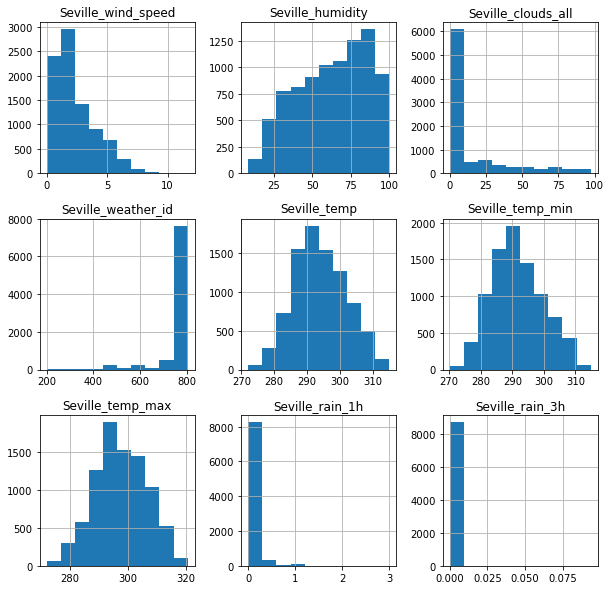

In [6]:
# have a look at feature distributions = predictor v outcome variable eg histogram for each feature
features = ['Seville_wind_speed','Seville_humidity','Seville_clouds_all','Seville_weather_id','Seville_temp','Seville_temp_min','Seville_temp_max','Seville_rain_1h','Seville_rain_3h','Seville_pressure'] # create a list of all numerical features
df[features].hist(figsize=(10,10));
#frequency distributions for the featiures

C:\Users\Amand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='load_shortfall_3h', ylabel='Density'>

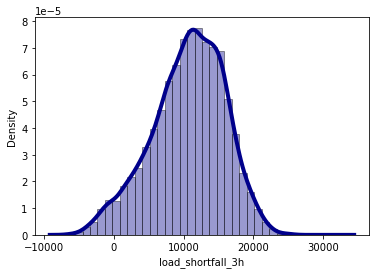

In [8]:
sns.distplot(df['load_shortfall_3h'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(df)hue="time"; #hue="load_shortfall_3h"
plt.show();

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features
X = df.drop(['load_shortfall_3h', "Valencia_pressure", "Valencia_wind_deg", "Seville_pressure"], axis=1)

y = df['load_shortfall_3h']

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models


In [ ]:
# evaluate one or more ML models


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic